In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
df = pd.read_csv('/content/adult-all.csv')
df = pd.DataFrame(df)

# Give the name to Header

In [3]:
df.columns = [
    "age",
    "workclass",
    "fnlwgt",  # to be ignored
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "Salary"  # dependent variable
]

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Step 2: Check for missing values

In [5]:
df.replace(['?',' '],np.nan,inplace=True)
print(df.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
Salary               0
dtype: int64


In [6]:
df = df.dropna()

# Step 3: Drop duplicates

In [7]:
df = df.drop_duplicates()

# step 4 : check for outliers





In [8]:
numeric_columns = df.select_dtypes(['int64'])

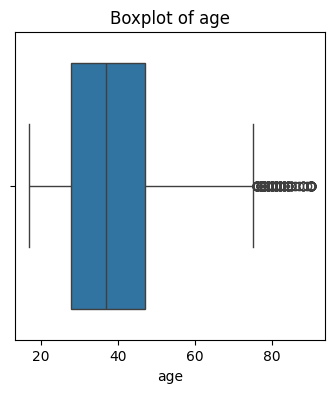

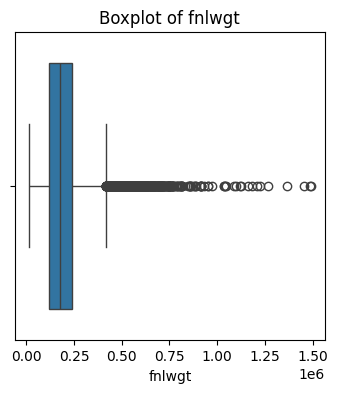

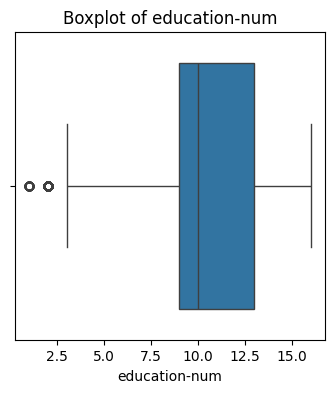

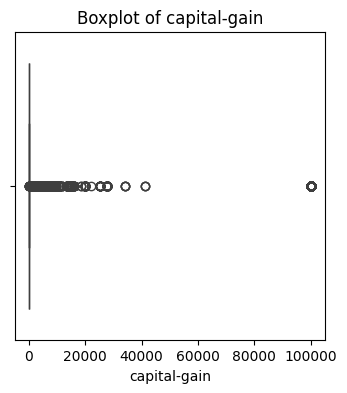

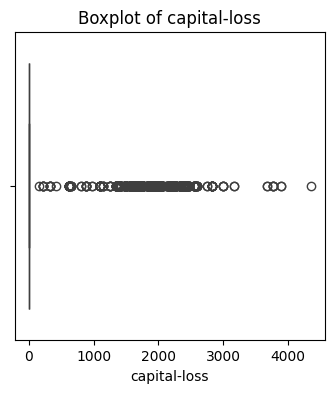

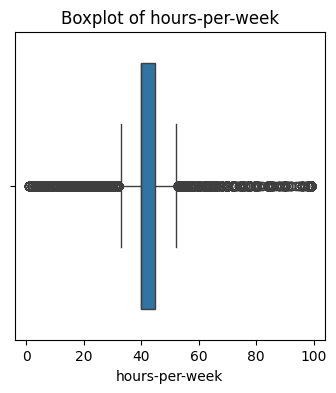

In [38]:
for col in numeric_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# one-hot encoding

In [10]:
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "sex", "native-country"]
X = pd.get_dummies(df.drop(columns=["Salary"]), columns=categorical_columns)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Salary"])

# True : 1 and False 0

In [12]:
X=X.apply(lambda x:x.map({True:1,False:0}) if x.dtypes=='bool' else x)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Step 3: Apply Robust Scaling to all columns in X

In [13]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
list_Accuracy = []
for k in range(1,21) :
  knn = KNeighborsClassifier(n_neighbors=k)  # Adjust n_neighbors as needed
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  list_Accuracy.append((k,accuracy))

In [21]:
max_accuracy = 0
k_best_value = None
for k_val,accuracy in list_Accuracy :
  if accuracy > max_accuracy :
    max_accuracy = accuracy
    k_best_value = k_val

print(f"the Best K value {k_best_value} and the accuracy score is {max_accuracy}")

the Best K value 20 and the accuracy score is 0.8643054786939679


# Classification Report and Confusion Matrix

In [25]:
knn = KNeighborsClassifier(n_neighbors=k_best_value)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Confusion Matrix
[[6360  430]
 [ 796 1449]]


In [26]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()
report.index = ['low-income', 'higher-income', 'accuracy', 'macro avg', 'weighted avg']
print(report)

               precision    recall  f1-score      support
low-income      0.888765  0.936672  0.912089  6790.000000
higher-income   0.771155  0.645434  0.702716  2245.000000
accuracy        0.864305  0.864305  0.864305     0.864305
macro avg       0.829960  0.791053  0.807403  9035.000000
weighted avg    0.859541  0.864305  0.860065  9035.000000


# Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

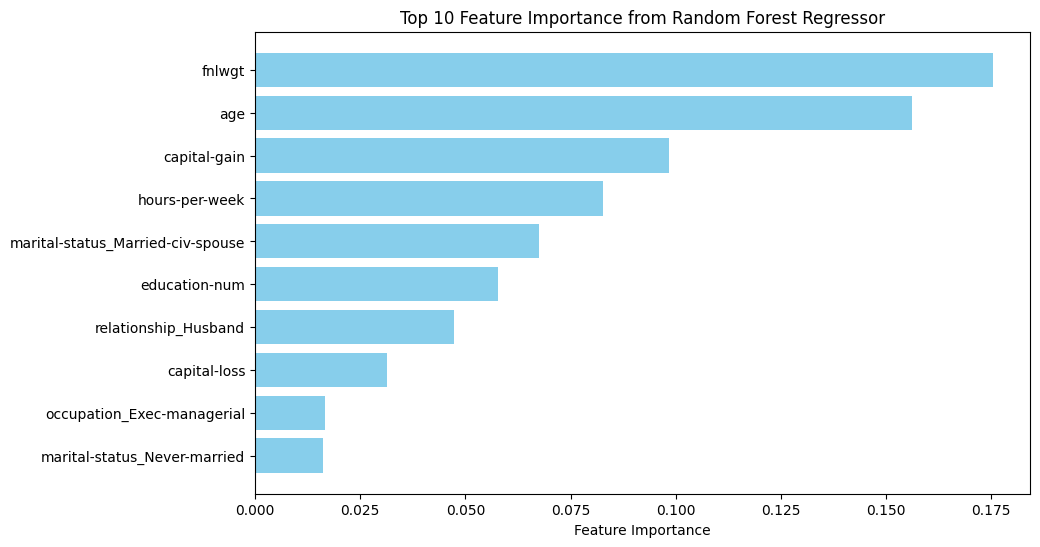

In [36]:
feature_importances = model.feature_importances_

# Get top 10 features
top_indices = np.argsort(feature_importances)[-10:]  # Indices of top 10 features

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), feature_importances[top_indices], color='skyblue', align='center')
plt.yticks(range(len(top_indices)), [X.columns[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance from Random Forest Regressor')
plt.show()